<a href="https://colab.research.google.com/github/Tecnologico-de-Monterrey-MNA/iayaa-Equipo-36/blob/main/Redneuronal_Equipo36.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey


## **Adtividad**
###**Red Neuronal Artificial - Perceptrón Multicapa : Multilayer Perceptrón (MLP)**


**Autor**

*   Kevin Brandon Cruz Mejia 




En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
import matplotlib.pyplot as plt
from sklearn.dummy import DummyClassifier

from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.preprocessing import FunctionTransformer   
from sklearn.compose import ColumnTransformer
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, RepeatedKFold,RepeatedStratifiedKFold,KFold, cross_validate

drive.mount('/content/drive')
fb_df = pd.read_csv('/content/drive/Shareddrives/IA/dataset_Facebook.csv', sep=';')
# el df tiene 500 lineas y 19 columnas
fb_df.head()

Mounted at /content/drive


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [ ]:
fb_df.columns

Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid', 'Lifetime Post Total Reach',
       'Lifetime Post Total Impressions', 'Lifetime Engaged Users',
       'Lifetime Post Consumers', 'Lifetime Post Consumptions',
       'Lifetime Post Impressions by people who have liked your Page',
       'Lifetime Post reach by people who like your Page',
       'Lifetime People who have liked your Page and engaged with your post',
       'comment', 'like', 'share', 'Total Interactions'],
      dtype='object')

#**Ejercicio-1.** 

In [ ]:
fb_df.rename (columns = {'Lifetime People who have liked your Page and engaged with your post' : 'LPE'}, inplace = True ) 


In [ ]:

fb_df1 = fb_df[['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday','Post Hour', 'Paid', 'LPE']]

fb_df_test = fb_df1
fb_df1 = pd.DataFrame(fb_df1)
fb_df1

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LPE
0,139441,Photo,2,12,4,3,0.0,119
1,139441,Status,2,12,3,10,0.0,1108
2,139441,Photo,3,12,3,3,0.0,132
3,139441,Photo,2,12,2,10,1.0,1386
4,139441,Photo,2,12,2,3,0.0,396
...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,392
496,81370,Photo,2,1,5,8,0.0,301
497,81370,Photo,1,1,5,2,0.0,363
498,81370,Photo,3,1,4,11,0.0,370


#**Ejercicio-2.**

In [ ]:
fb_df1 = fb_df1.dropna()
#fb_df1[['Paid']] = fb_df[['Paid']].astype(int)


#fb_df1[['Paid']] = fb_df1[['Paid']].round(0).astype(int)


In [ ]:
fb_df1[['Paid']]

,Paid
0,0.0
1,0.0
2,0.0
3,1.0
4,0.0
...,...
494,0.0
495,0.0
496,0.0
497,0.0


In [ ]:
X=fb_df1.iloc[:,:-1] 
Y=fb_df1.iloc[:,-1] 

print(X.shape)
print(Y.shape)

(499, 7)
(499,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True,random_state=42)
X_train.shape
X_test.shape

(100, 7)

#**Ejercicio-3.**

In [ ]:
#Definicion de funciones (error)
from sklearn.metrics import mean_squared_error

def mi_RMSE (x_real, y_pred):
   
    MSE = np.square((x_real - y_pred)).mean()
    RMSE = np.sqrt(MSE)
    return RMSE



In [ ]:
def mi_MAE (x_real, y_pred):
   
    MAE = np.abs((x_real - y_pred)).mean()
    return MAE

In [ ]:
def mi_MAPE (x_real, y_pred):  
  
  MAPE = np.abs((x_real - y_pred)/x_real).mean()*100
  return MAPE

In [ ]:
def mi_MAPE_INV (x_real, y_pred):  
  
  MAPE_inv = 100 - np.abs((x_real - y_pred)/x_real).mean()*100
  return MAPE_inv


#**Ejercicio-4.**

In [ ]:
fb_df1.dtypes  # tipo de dato de cada variable


Page total likes      int64
Type                 object
Category              int64
Post Month            int64
Post Weekday          int64
Post Hour             int64
Paid                float64
LPE                   int64
dtype: object

#Caracterización Variables

Page total likes :     Número de personas que dio me gusta

Type :   Tipo de contenido (Foto, Status, link; video)

Category   : 3 categorias (accion, producto, inspiración)        

Post Month  : Mes de publicación (Van de 1 a 12)

Post Weekday : Dia de publicación (Van de 1 a 7)

Post Hour : Hora de publicación (Van de 0 a 24)

Paid : Binaria (compañia pago a FB si o no)

LPE : Variable de Salida 

In [ ]:
fb_df1['Type'].value_counts() #categorias de la variable type
#fb_df1['Post Hour'].value_counts()

Photo     425
Status     45
Link       22
Video       7
Name: Type, dtype: int64

In [ ]:
fb_df1['Type'] = fb_df1['Type'].map({'Photo' : 1, 'Status' : 2, 'Link' : 3, 'Video' : 4})


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
fb_df1.head(2)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,LPE
0,139441,1,2,12,4,3,0.0,119
1,139441,2,2,12,3,10,0.0,1108


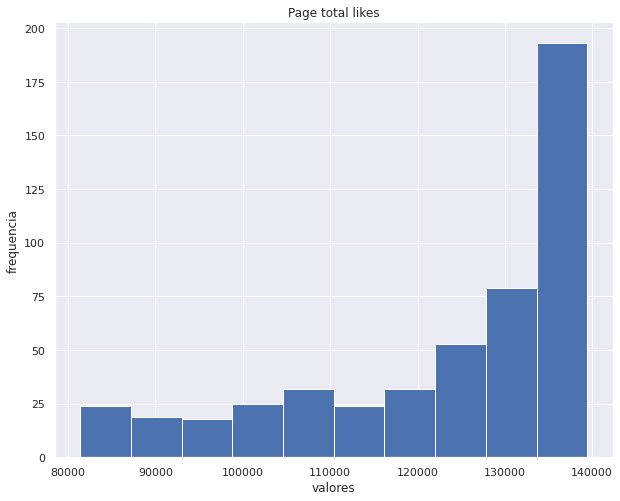

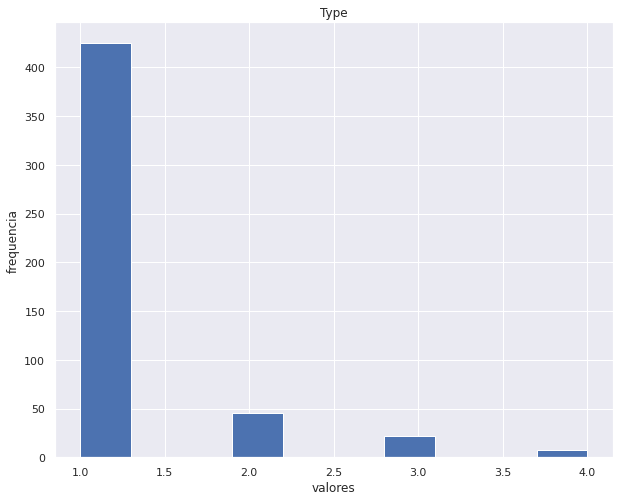

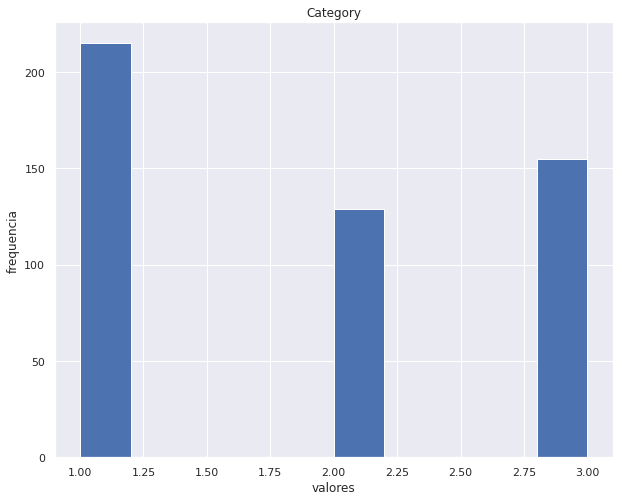

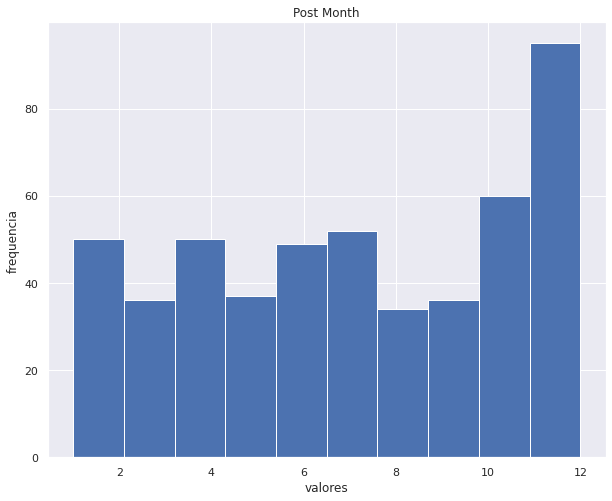

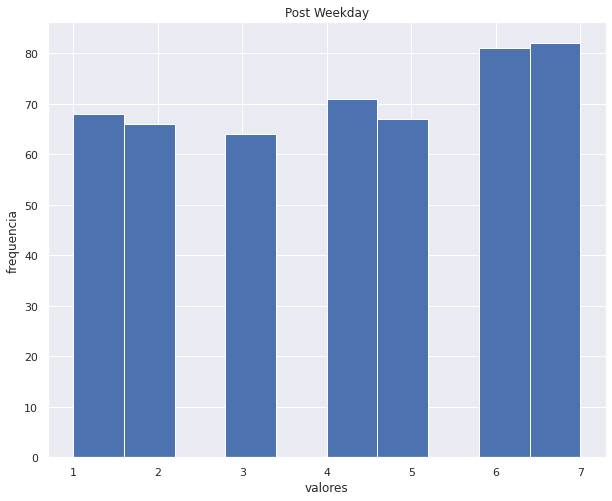

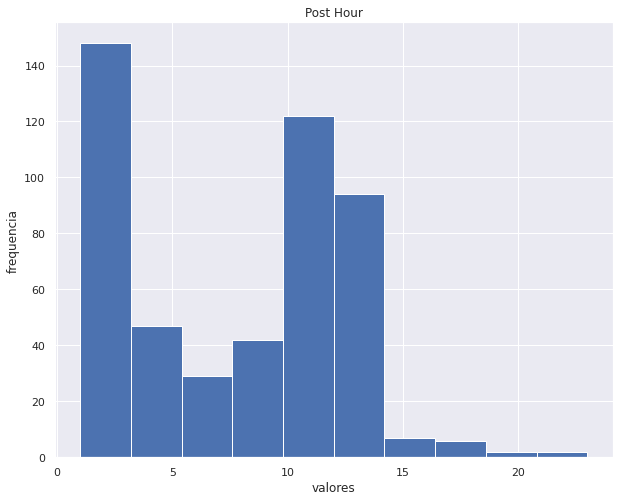

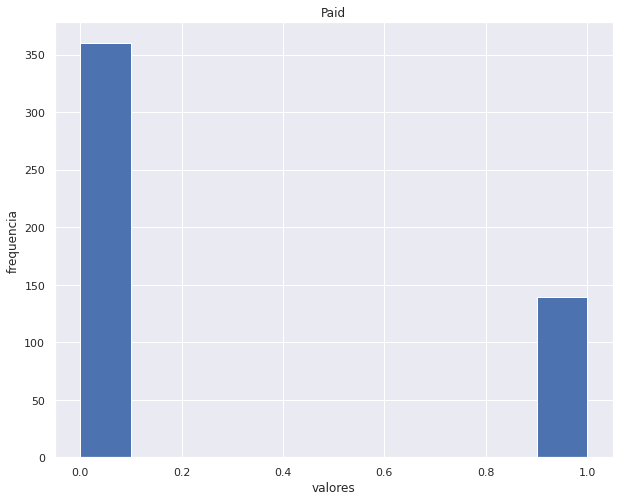

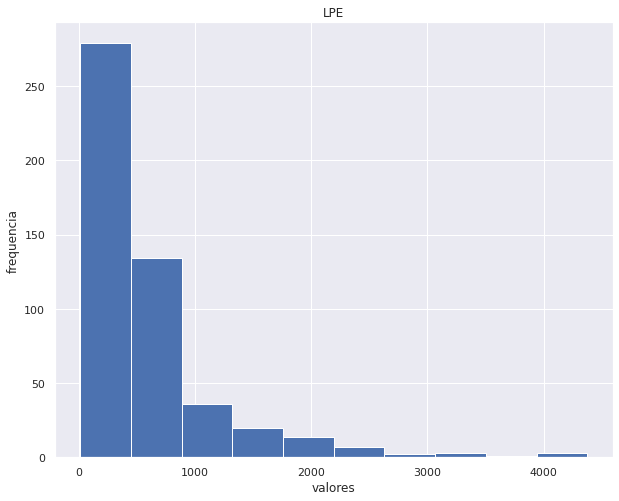

In [ ]:
#distribuciones
variables = ['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday','Post Hour', 'Paid', 'LPE']
sns.set(rc={'figure.figsize':(10,8)})

for i in range(0,8):
 
    plt.hist(fb_df1[variables[i]], 10) #HISTOGRAMAS
    plt.ylabel('frequencia')
    plt.xlabel('valores')
    plt.title(variables[i])
    plt.show()

In [ ]:
fb_df1.isna().sum() #solo paid tiene 1 dato faltante

Page total likes    0
Type                0
Category            0
Post Month          0
Post Weekday        0
Post Hour           0
Paid                0
LPE                 0
dtype: int64

In [ ]:
y_train.head()

56     240
227    417
280    375
486    440
220    279
Name: LPE, dtype: int64

In [ ]:
#Pipeline

# Transformaciones para las variables numéricas
numeric_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='median')),
                            ('scaler', StandardScaler())
                        ]
                      )


# Transformaciones para las variables categóricas
categorical_transformer = Pipeline(
                            steps=[
                                ('imputer', SimpleImputer(strategy='most_frequent')),
                                ('onehot', OneHotEncoder())
                            ]
                          )



num_columns = ['Page total likes']   
cat_features = ['Type', 'Category', 'Post Month', 'Post Weekday','Post Hour', 'Paid']

ColumnPreprocessor = ColumnTransformer(transformers = [('numeric', numeric_transformer, num_columns),
                                                       ('categorical', categorical_transformer, cat_features)],
                                                       remainder='passthrough',sparse_threshold=0)




#fb_df1new = ColumnPreprocessor.fit_transform(X_train)  #falta incluir la variable de salida LPE






In [ ]:
#fb_df1new['Paid'] = fb_df1new['Paid'].astype(int)

#**Ejercicio-5.**

In [ ]:
XD = X_train
YD = y_train

X_dtrain, X_dval, y_dtrain, y_dval = train_test_split(XD, YD, train_size=0.75, random_state=1)   

print(X_dtrain.shape)
print(X_dval.shape)

modeloDummy = DummyClassifier(strategy='stratified')   
modeloDummy.fit(X_dtrain, y_dtrain)       
yhat = modeloDummy.predict(X_dval)

#hallando los errores RMSE / MAE / MAPE

RMSE = mi_RMSE(y_dval, yhat)
MAE = mi_MAE(y_dval, yhat)
MAPE = mi_MAPE(y_dval, yhat)

print('\nRMSE: ', RMSE)  
print('\nMAE: ', MAE) 
print('\nMAPE: ', MAPE,"%") 

(299, 7)
(100, 7)

RMSE:  832.9225654285037

MAE:  512.0

MAPE:  122.5008580772579 %


In [ ]:
#Definiendo Modelos a Utilizar

def get_models():
  modelos, nombres = list(), list()

  # técnica y nombre: Regresión Lineal
  nombres.append('Regresión Lineal')
  modelos.append(LinearRegression())

  # técnica y nombre: Bosque Aleatorio
  nombres.append('Bosque Aleatorio')
  modelos.append(RandomForestClassifier(n_estimators=5))

  # técnica y nombre: Perceptron Multicapa
  nombres.append('Perceptron Multicapa')
  modelos.append(MLPRegressor()) 

  return modelos, nombres

#**Ejercicio-6.**

In [ ]:
X_train

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
56,138329,Photo,1,11,5,11,0.0
227,131728,Photo,1,7,4,10,1.0
280,126345,Photo,2,6,1,12,0.0
486,85979,Photo,3,1,1,12,0.0
220,131956,Photo,2,8,1,4,0.0
...,...,...,...,...,...,...,...
106,137020,Photo,3,10,1,11,0.0
270,128032,Photo,2,7,4,5,1.0
348,117764,Photo,3,5,6,8,1.0
435,100732,Photo,1,3,6,15,0.0


In [ ]:
#Estandarizando Variables numericas

media_train = X_train[num_columns].mean()
desv_train = X_train[num_columns].std()

X_train[num_columns] = (X_train[num_columns] - media_train) / desv_train
X_test[num_columns] =  (X_test[num_columns] - media_train) / desv_train #Usar media y desviacion estandar de datos de entrenamiento

In [ ]:
X_train

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid
56,0.940588,Photo,1,11,5,11,0.0
227,0.521837,Photo,1,7,4,10,1.0
280,0.180353,Photo,2,6,1,12,0.0
486,-2.380365,Photo,3,1,1,12,0.0
220,0.536301,Photo,2,8,1,4,0.0
...,...,...,...,...,...,...,...
106,0.857548,Photo,3,10,1,11,0.0
270,0.287372,Photo,2,7,4,5,1.0
348,-0.364004,Photo,3,5,6,8,1.0
435,-1.444472,Photo,1,3,6,15,0.0


In [ ]:
#Conversion de Variables Categoricas con Get_Dummies

X_test_new = pd.get_dummies(X_test,columns=cat_features,drop_first=True)

X_train_new = pd.get_dummies(X_train,columns=cat_features,drop_first=True)
X_train.columns


Index(['Page total likes', 'Type', 'Category', 'Post Month', 'Post Weekday',
       'Post Hour', 'Paid'],
      dtype='object')

In [ ]:

X_test[['Post Hour']].groupby('Post Hour').count()



""
Post Hour
1
2
3
4
5
6
7
8
9


In [ ]:
y_train

56     240
227    417
280    375
486    440
220    279
      ... 
106    328
270    975
348    403
435    472
102    205
Name: LPE, Length: 399, dtype: int64

In [ ]:
modelos, nombres = get_models()  # cargamos los modelos a comparar
resultados = list() 

for i in range(len(modelos)):
    mi_Pipeline = Pipeline(steps = [('preprocessor', ColumnPreprocessor),('modelo', modelos[i])])

    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=7)
    misscores = {'rmse':make_scorer(mi_RMSE), 'mae':make_scorer(mi_MAE), 'mape':make_scorer(mi_MAPE) }

    est = modelos[i]
    if (i == -1):
      est = mi_Pipeline

    scores = cross_validate(est,
                              X_train_new,
                              np.ravel(y_train),
                              cv =cv,
                              scoring=misscores,
                              n_jobs=5
                    
                              )
    

    resultados.append(scores)

    mape =np.mean(scores['test_mape']).round(2)
    print('\033[1m %s: \033[0m \n RMSE: %.3f \n MAE: %.3f \n MAPE: %.2f' % (nombres[i],
                                                                          np.mean(scores['test_rmse']),
                                                                          np.std(scores['test_mae']),
                                                                          mape
                                                                          ),'%')



 Regresión Lineal:  
 RMSE: 526.011 
 MAE: 30.082 
 MAPE: 110.81 %
 Bosque Aleatorio:  
 RMSE: 764.536 
 MAE: 56.589 
 MAPE: 88.06 %
 Perceptron Multicapa:  
 RMSE: 795.213 
 MAE: 57.388 
 MAPE: 72.11 %


**SCORES A BATIR MODELO DUMMY**

RMSE:  832.9225654285037

MAE:  512.0

MAPE:  122.5008580772579 %

#**Ejercicio-7.**

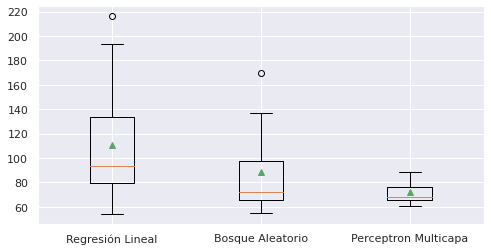

In [ ]:
#BOXPLOT DE CADA MODELO - ENTRENAMIENTO

sns.set(rc={'figure.figsize':(8,4)})


bpmape = list()

for i in range (len(resultados)):
   rr = resultados[i]['test_mape']
   bpmape.append(resultados[i]['test_mape'])

plt.boxplot(bpmape, labels=nombres, showmeans=True)
plt.show()

#**Ejercicio-8.**

In [ ]:
def make_grid(dicc_grid,md,mi_sco,title):

  pipeline = Pipeline(steps=[('ct',ColumnPreprocessor),('m',md)])
  cv = RepeatedKFold(n_splits=2)

  grid= GridSearchCV(md, 
                      param_grid=dicc_grid, 
                      cv=cv, 
                      scoring=make_scorer(mi_sco,greater_is_better = False),
                              n_jobs=5)
  
  #Xx = ColumnPreprocessor.fit_transform(X_train)
  grid.fit(X_test_new, np.ravel(y_test))

  score_real =   np.abs((grid.best_score_)).round(2) #Cuando se quiere de minimazar(greater_is_better = False), retornara negativo, se debe interpretar en valores absolutos
  print('\033[1m %s: \033[0m ' %(title))
  print(' Mejor score obtenido con la mejor combinación:',score_real,"%")
  print(' Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
  print(' Métrica utilizada:', 'MAPE')
  print('\n\n')

In [ ]:
dicc_grid_reg = {'n_jobs':[1,3,5],
                 'fit_intercept':[True, False]
               
              }

dicc_grid_randomforest = {
              'ccp_alpha':[0,0.01,0.001,0.0001],
              'criterion':['gini','entropy','log_loss'],
              'max_depth':[4,6,10,15,20],
              'min_samples_split':[2,3,4,5,6],
              'class_weight':[{0:0.5,1:0.5},{0:0.2,1:0.8},'balanced']
              }



dicc_grid_mlp = {
              'alpha':[0.0001,0.00001,0.000001],
              'learning_rate_init':[0.01,0.001],
              'hidden_layer_sizes':[1,2,3],
              'max_iter':[1000]
              }

#**Ejercicio-9.**

In [ ]:
make_grid(dicc_grid_mlp, modelos[2], mi_MAPE,'Perceptron MultiCapa')

 Perceptron MultiCapa:  
 Mejor score obtenido con la mejor combinación: 90.93 %
 Mejor combinación de valores encontrados de los hiperparámetros: {'alpha': 1e-06, 'hidden_layer_sizes': 3, 'learning_rate_init': 0.001, 'max_iter': 1000}
 Métrica utilizada: MAPE





/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Feature: 0, Score: 0.00113
Feature: 1, Score: -0.00553
Feature: 2, Score: 0.00594
Feature: 3, Score: 0.00028
Feature: 4, Score: 0.00340
Feature: 5, Score: -0.00147
Feature: 6, Score: 0.00007
Feature: 7, Score: -0.00050
Feature: 8, Score: 0.00025
Feature: 9, Score: -0.00012
Feature: 10, Score: -0.00008
Feature: 11, Score: 0.00075
Feature: 12, Score: 0.00009
Feature: 13, Score: 0.00027
Feature: 14, Score: 0.00001
Feature: 15, Score: -0.00086
Feature: 16, Score: 0.00068
Feature: 17, Score: -0.00035
Feature: 18, Score: 0.00131
Feature: 19, Score: -0.00031
Feature: 20, Score: 0.00026
Feature: 21, Score: -0.00016
Feature: 22, Score: -0.00022
Feature: 23, Score: 0.00019
Feature: 24, Score: -0.00074
Feature: 25, Score: 0.00027
Feature: 26, Score: 0.00009
Feature: 27, Score: -0.00001
Feature: 28, Score: -0.00009
Feature: 29, Score: -0.00028
Feature: 30, Score: 0.00016
Feature: 31, Score: 0.00083
Feature: 32, Score: -0.00001
Feature: 33, Score: 0.00000
Feature: 34, Score: 0.00036
Feature: 35, Sc

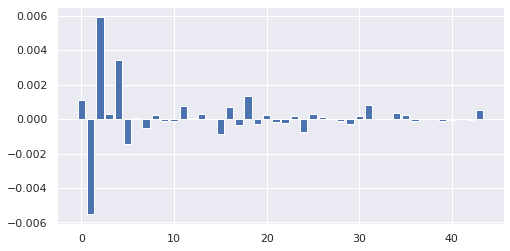

In [ ]:
modelo_MLP = MLPRegressor(hidden_layer_sizes=3, 
                            max_iter=1000, 
                            alpha=0.00001,
                            learning_rate_init=0.001)  

modelo_MLP.fit(X_train_new, y_train)

importance = permutation_importance(modelo_MLP, X_train_new, y_train, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-10.**

In [ ]:
make_grid(dicc_grid_randomforest, modelos[1], mi_MAPE,'Bosque Aleatorio')

 Bosque Aleatorio:  
 Mejor score obtenido con la mejor combinación: 98.0 %
 Mejor combinación de valores encontrados de los hiperparámetros: {'ccp_alpha': 0, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
 Métrica utilizada: MAPE





/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
14000 fits failed out of a total of 18000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
12000 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 367, in fit
    y, expanded_class_weight = self._validate_y_class_weight(y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py", line 783, in _validate_y_class_weight
    expanded_class_weight = compute_

Feature: 0, Score: 0.06300
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.00900
Feature: 5, Score: 0.04900
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.00700
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00000
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.00000
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.00100
Feature: 17, Score: 0.01500
Feature: 18, Score: 0.01000
Feature: 19, Score: 0.01700
Feature: 20, Score: -0.00200
Feature: 21, Score: 0.02700
Feature: 22, Score: 0.00900
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.01200
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00000
Feature: 28, Score: 0.00000
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00000
Feature: 31, Score: 0.01000
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.01000
Feature: 34, Score: -0.00100
Feature: 35, Score: 0.00000


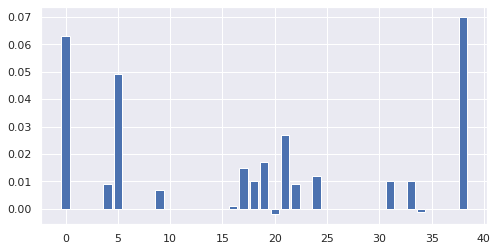

In [ ]:
modelo_MLP = RandomForestClassifier(
    ccp_alpha= 0.01, class_weight= 'balanced', criterion='entropy', max_depth= 20, min_samples_split=2
)  

modelo_MLP.fit(X_test_new, y_test)

importance = permutation_importance(modelo_MLP, X_test_new, y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-11.**

In [ ]:
#Encontrar Mejores hiperparametros para modelo de regresion lineal multiple
make_grid(dicc_grid_reg, modelos[0], mi_MAPE,'Regresión Lineal Multiple')

 Regresión Lineal Multiple:  
 Mejor score obtenido con la mejor combinación: 294.75 %
 Mejor combinación de valores encontrados de los hiperparámetros: {'fit_intercept': True, 'n_jobs': 1}
 Métrica utilizada: MAPE





Feature: 0, Score: 1.01313
Feature: 1, Score: 0.01057
Feature: 2, Score: 0.34926
Feature: 3, Score: 0.00496
Feature: 4, Score: 0.00265
Feature: 5, Score: 0.09066
Feature: 6, Score: 0.24486
Feature: 7, Score: 0.00237
Feature: 8, Score: 0.07109
Feature: 9, Score: 0.38917
Feature: 10, Score: 0.22546
Feature: 11, Score: 0.17057
Feature: 12, Score: 0.28429
Feature: 13, Score: 0.36403
Feature: 14, Score: 0.62216
Feature: 15, Score: 0.46017
Feature: 16, Score: 0.20459
Feature: 17, Score: 0.17021
Feature: 18, Score: 0.07445
Feature: 19, Score: 0.05953
Feature: 20, Score: 0.17058
Feature: 21, Score: 0.13699
Feature: 22, Score: 0.06156
Feature: 23, Score: 0.08309
Feature: 24, Score: 0.04263
Feature: 25, Score: 0.02500
Feature: 26, Score: 0.00402
Feature: 27, Score: 0.00283
Feature: 28, Score: 0.01814
Feature: 29, Score: 0.00399
Feature: 30, Score: 0.02976
Feature: 31, Score: 0.15651
Feature: 32, Score: 0.00017
Feature: 33, Score: 0.01909
Feature: 34, Score: 0.30384
Feature: 35, Score: 0.02378
Fe

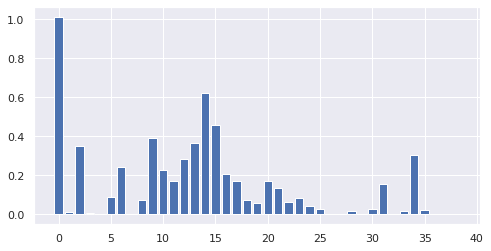

In [ ]:
modelo_MLP = LinearRegression(
    n_jobs= 1,
    fit_intercept=True
)  

modelo_MLP.fit(X_test_new, y_test)

importance = permutation_importance(modelo_MLP, X_test_new, y_test, n_repeats=10)

# visualicemos la importancia de cada métrica, de las cuales sabemos
# cuáles son las más importantes, de acuerdo a como se definieron al inicio:

for i,v in enumerate(importance['importances_mean']):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
plt.bar([x for x in range(len(importance['importances_mean']))], importance['importances_mean'])
plt.show()

#**Ejercicio-12.**

# Comparacion de resultados con el articulo de Moro-Rita-Vala

Se concluye que los resultados no son los mismo por las siguientes razones:
  * El articulo usa support vector machine como modelo para realizar las predicciones.
  * El campo type es que mas relevancia tiene en el articulo, en nuestro caso se ocupo otras trasnformaciones que no contribuye al resultado esperado.
  * Para el modelo del articulo menciona que es mejor tener intacto las variables de entrada, pero en nuestro caso al ocupar el perceptron multicapa, los hiperparametros como la funcion de activiacion, el numero de neuronas y capas ocultas para una salida que se espera en un principio binaria o entre 0 - 1, se tiene que estandarizar y posterior con la funcion de costos, le aleatoriedad al momento de realizar las predicciones y obtener el MAPE, asi respectivamente con los hiperparametros de regresion lineal y bosque aleatorio
  * La trasnformaciones realizadas para los elementos de entrada asi como los de salida
  * El numero de iteracciones respectivamente para cada caso  

# Conclusiones de la actividad

* En esta acitividad inicia con la regresion lineal que busca la mejor recta con el minimo de error para la clasificacion, el bosque aleatorio que tiende a combinar cientos de árboles de decisión y luego entrena cada árbol de decisión en una muestra diferente de las observaciones, las predicciones finales del bosque aleatorio se realizan promediando las predicciones de cada árbol individual para evitar el *overfit*.y el perceptron multicapa que es una combinacion de varios perceptrones simples, esto es un clasificador lineal que busca generar un hiperplano con un recta ortogonal en funcion de rectas, estas rectas en el perceton multicapa son varias para clasificar mejor la clases.
* Las funciones de errores que se utlizaron fueron RMSE, MAE, MAPE, para cada uno de los modelos anteriores, obteniendo cifras en un principio altas, para poder verificar el desempeño de los ejercicos posteriores.
* Se aplicó la funcion de regresion dummy para generar predicciones con reglas simples y poder hacer comparaciones con otros modelos de regresion.
* Usando los modelos de regresión lineal múltiple, el bosque aleatorio y el perceptrón multicapa obtenemos errores de modelos de regresion altos pero menores a comparacion del modelo de regresion dummy del ejercicio anterior, en una primera aproximacion con los errores podemos apreciar que son altos por los que el modelo de regresion lineal, lo que nos permite suponer que los modelos estan sobrentrenados porque los errores altos que son parecidos a la varianza o desviacion estandar significa que el modelo no esta identificando correctamente o aprendiendo solo con la clase positiva.
* Al obtener los diagramas de caja y bigote con MAPE observamos que con el modelo de regresion lineal y bosque aleatoria existe algun valor atipico u outlier, en el perceptron multicapa mostro mejor resultado sin nungun valor atipico y con menos MAPE, comparando con las metricas del articulo observamos que aun tenemos mayor porcentaje de error
* Se uso el gridsearh para buscar los mejores hiperparametros para posteriormente analizar la importance features con permutacion de sklearn de los siguientes modelos
  * Para el perceptron multicapa se observan la grafica de barras con varias features que demustra el numero de features en el perceptron y su score de que tan alto es la relacion de las features con la variable target, por lo que a pesar de tener 43 features alrededor de 10 features son las que mejor score tiene en relacion con la variable target.
 * Para el bosque aleatorio son alrededor de 11 features con mejor score de relacion con la variable target
 * Para regresion lineal obtenemos alrededor de 13 features con mejor score de relacion con la variable target.
 Esto demuestra lo que se menciona en la practica al usar el perceptron multicapa se tiene que realizar un mayor testing tanto con sus hiperparametros como en su capa oculta para obtener mejores resultados en comparacion a los anteriores modelos, para el bosque aleatorio se aprecio que a pesar de no tener todas sus features con buen score, tiene un buen numero o desempeño en el score, asi como regresion lineal multiple tiene un mejor score en sus features asi como menos features diferente de cero, esto es debido a que el perceptron multicapa esta compuesto de un conjunto de clasificadores lineales como lo es el modelo de regresion lineal multipaca, mientras que el bosque aleatorio hace el promedio de los resultados obtendios por varios arboles de decisiones, entonces si el feature importance hace relevancia a que tan fuerte es la relacion de las fetures con la variable target, podemos concluir de el modelo de perceptron multiple al tener los scores de importance feature bajos no depende demasiado de estas features en su modelo, lo que es un indicador que se requiere de seguir haciendo modificaciones en sus hiperparametros hasta encontrar el adecuado, como lo indica en la explicacion practica que este modelo no es tan ocupado a diferencia de otros por el tiempo para entrenar y mejorar el modelo para realizar mejores predicciones.


Por último y comparativamente con el analisis realizado por Moro-Rita-Vala, el MAPE en la variable de salida LPE se ubica en 26.9% el cual se encuentra bastante alejado de nuestros resutaldos, lo cual indica que se deberian ajustar parametros para mejorar esta metrica.

###**Fin de la Actividad de la semana 7.**